[View in Colaboratory](https://colab.research.google.com/github/MeganMcAndie/Research-with-Larson/blob/master/Contour_Maps.ipynb)

In [0]:
import numpy as np; np.random.seed(0)
from matplotlib import pyplot as plt
import scipy.stats as ss

import seaborn as sns; sns.set()

# Left vs Right Uncertainty in the Near-Infrared Reddinging

This notebook gathers all of the left and right error for each spectral type. We can compare the left and right error for each spectral type as well as comparing the spectral types against eachother.  Here I have put them all on one graph with a shift to easily scan across and notice the differences. I have done this for a standardbin of 2 and 5 respectively. 

In [0]:
%matplotlib inline

Intrinsic colors and spectral types from Dr. Larson's original code. There are 61 Spectral type in total and we have the h-k and j-h in a separate array for each spectral type. 

In [0]:
intHK=np.array([-0.1,-0.09,-0.09,-0.09,-0.09,-0.08,-0.09,-0.06,-0.07,-0.05,-0.06,-0.05,-0.05,-0.03,0,0.0025,0.005,0.0083,
            0.0117,0.015,0.02,0.025,0.0267,0.0283,0.03,0.0325,0.035,0.0367,0.0383,0.04,0.0425,0.045,0.0467,0.0483,
            0.05,0.051,0.052,0.0535,0.055,0.0575,0.06,0.06375,0.0675,0.07125,0.075,0.0825,0.09,0.0975,0.105,0.11,0.12,
            0.13,0.14217,0.1533,0.165,0.2,0.21,0.25,0.275,0.32,0.37])

intJH=np.array([-0.065,-0.065,-0.075,-0.095,-0.095,-0.075,-0.025,-0.045,-0.035,-0.045,-0.025,-0.025,-0.005,0.005,0,0.01,
            0.02,0.033,0.0467,0.06,0.075,0.09,0.103,0.117,0.13,0.1475,0.165,0.187,0.208,0.23,0.258,0.285,0.292,0.298,
            0.305,0.3125,0.32,0.325,0.33,0.35,0.37,0.39,0.41,0.43,0.45,0.475,0.5,0.54,0.58,0.61,0.635,0.66,0.6717,
            0.683,0.695,0.68,0.665,0.62,0.6,0.62,0.6])

SpType=np.array(['O6V','O7V','O8V','O9V','B0V','B1V','B2V','B3V','B4V','B5V','B6V','B7V','B8V','B9V',
            'A0V','A1V','A2V','A3V','A4V','A5V','A6V','A7V','A8V','A9V',
            'F0V','F1V','F2V','F3V','F4V','F5V','F6V','F7V','F8V','F9V',
            'G0V','G1V','G2V','G3V','G4V','G5V','G6V','G7V','G8V','G9V',
            'K0V','K1V','K2V','K3V','K4V','K5V','K6V','K7V','K8V','K9V',
            'M0V','M1V','M2V','M3V','M4V','M5V','M6V'])

x=np.arange(intHK.size)



Simulating uncertainty in observed colors with knowledge of spectral type from Monte Carlo. 

In [0]:
def prob_bins(x,meanbin,stdbin):
    # Create the probability distribution:
    lowedge, highedge = np.arange(len(x))-0.5,np.arange(len(x))+0.5 # put items at bin centers
    prob_bins = ss.norm.cdf(highedge, loc=meanbin, 
                            scale = stdbin)-ss.norm.cdf(lowedge, loc=meanbin, scale = stdbin)
    prob_bins = prob_bins / prob_bins.sum() # normalize the probabilities so their sum is 1

    return prob_bins

Here we create 2D arrays for the right error and the left error. In our case these will be the values that are more than 1.6 and those that are less than 1.6. I have also created an array for the number of data points we will collect for each spectral types. We will change the line of sight 91 times going from 0.1 to 1.0in steps of 0.01. At this point we will also assign each spectral type a number for its position in the pervious array: SpType, this will be labled spytpes. 

## This is for stdbins=2

In [0]:
RMSLESS=np.zeros((61,91))          #Making arrays to hold all the information for left and right for all the spectral types. 
RMSMORE=np.zeros((61,91))


los=np.arange(0.1,1.01,0.01)  #steps of los to take
sptypes = np.arange(0,61,1)  #number of spectral types


In the next cell we make all of our calculations for each spectral type to find the left and right error. First we set the standard deviation bin width to 2 and the line of sight of R to 1.6. As we run through each spectral type we change the line of sight from 0.1 to 1.0 in steps of 0.01. For each line of sight (91 in total) we calculate the standard deviation R and then collect the absolute value of parts that are less than 1.6 and more than 1.6 and put them into the 2D arrays RMSLESS and RMSMORE respectivly. 

At the end of the cell I use if and else statements to fix the not a number problems I expierenced before. We were getting NaN values because when we took the root mean squared for both the less than and greater than values some R arrays did not include any values that were less or sometimes none that were more. So when we take the RMS value of an array with nothing we end up dividing by zero and getting NaN values. To fix this I simply make the RMS value 0 at those points. 

In [6]:
#now to make a function that will put the left and right side of each spectral type into my 2d array


for k in sptypes:  #going through each spectral type and assigning it to meanbin 
  meanbin = k
  stdbins = 2
  
  for i in range(0,90,1):       #changing the losEHK from 0.1 to 1 
    losR=1.6
    losEHK=los[i]         #this goes from 0.1 to 1 in incriments of 0.1
    losEJH=losR*losEHK

    # Calculate the error-free photometry, all spectral types
    simJH=losEJH+intJH
    simHK=losEHK+intHK
  
  
    # Sample the probability distribution:
    # customize the probability distribution
    prob = prob_bins(x,meanbin,stdbins) 
    # randomly choose a set of bin indices based on that probability
    nums = np.random.choice(x, size = 100000, p = prob) 

    R=(simJH[meanbin]-intJH[nums])/(simHK[meanbin]-intHK[nums])
    
    
    
    #Fixing the NaN values
    if np.any(R<1.6)==True:      #np.any goes trough the R values and gives back True or false if there are any. 
      RMSl=np.sqrt(np.mean((R[R<1.6]-1.6)**2))
    else:
      RMSl=0                     # if there are not any we simply set that value to zero
      
  
    if np.any(R>1.6)==True:         # if there are any R values that are bigger than 1.6 we compute the root mean squared value, if not it is zero.
      RMSg=np.sqrt(np.mean((R[R>1.6]-1.6)**2))
    else:
      RMSg=0               
      
      
      
      
    RMSLESS[k][i]=RMSl   #RMS less than 1.6 array for spectral type l position i
    RMSMORE[k][i]=RMSg  #RMS greater than 1.6 array for spectral type l position i 
    

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in divide



From earlier investigation we noticed that we have some values that are 15 magnitudes higher than all the other values. I noticed that these values occur in M and K type stars and it occurs because we are dividing by zero or very close to zero in whch case it means that the data is very close to being exact. In the cell below I run through all the data again and if any value is bigger than 100 I set it equal to 0 so that it does not show up as a crazy outlier on the graph. 

In [0]:
##shifting down the outliers from our data##

for k in range(0,60):      #looking at each spectral type
  for i in range(0,90):    #looking through each deviation for each line of sight value
    if RMSLESS[k][i]>100:
      RMSLESS[k][i]=0       #shifting outliers down to make important parts visible
   
    if RMSMORE[k][i]>100:
      RMSMORE[k][i]=0      #shifting outliers down to make important parts visible


## Stdbins=5

Now we are going to do all the exact same thing that we did before but now we will have at standard bin value of 5.

First we need to creat some new arrays for these values to go into. For simplicity I will use the same names as before but attach a 5 to the end of it so we know that this is different with a standard bin of 5. 

In [0]:
RMSLESS5=np.zeros((61,91))          #Making arrays to hold all the information for left and right for all the spectral types. 
RMSMORE5=np.zeros((61,91))

Now we will fill these new arrays in the same way as last time but by changing stdbins from 2 to 5. I will also be adjusting the data collection array names so that we put this new data into the right place.  

In [9]:
#put the left and right side of each spectral type into my 2d array this time with stdbins=5


for k in sptypes:  #going through each spectral type and assigning it to meanbin 
  meanbin = k
  stdbins = 5      ### Changed this to 5###
  
  for i in range(0,90,1):       #changing the losEHK from 0.1 to 1 
    losR=1.6
    losEHK=los[i]         #this goes from 0.1 to 1 in incriments of 0.1
    losEJH=losR*losEHK

    # Calculate the error-free photometry, all spectral types
    simJH=losEJH+intJH
    simHK=losEHK+intHK
  
  
    # Sample the probability distribution:
    # customize the probability distribution
    prob = prob_bins(x,meanbin,stdbins) 
    # randomly choose a set of bin indices based on that probability
    nums = np.random.choice(x, size = 100000, p = prob) 

    R=(simJH[meanbin]-intJH[nums])/(simHK[meanbin]-intHK[nums])

    
    #fixing NaN values
    if np.any(R<1.6)==True:      #np.any goes trough the R values and gives back True or false if there are any. 
      RMSl=np.sqrt(np.mean((R[R<1.6]-1.6)**2))
    else:
      RMSl=0
      
    if np.any(R>1.6)==True:
      RMSg=np.sqrt(np.mean((R[R>1.6]-1.6)**2))
    else:
      RMSg=0               

      
    RMSLESS5[k][i]=RMSl   #RMS less than 1.6 array for spectral type l position i
    RMSMORE5[k][i]=RMSg  #RMS greater than 1.6 array for spectral type l position i 
    

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in divide


We know that there are some major outliers in our data as well as more nan values so below is a cell that identifies where they are and sets them equal to zero like before.

In [0]:
##shifting down the outliers from our data##

for k in range(0,60):      #looking at each spectral type
  for i in range(0,90):    #looking through each deviation for each line of sight value
    
    #shifting down the outliers#
    if RMSLESS5[k][i]>100:
      RMSLESS5[k][i]=0       
   
    if RMSMORE5[k][i]>100:
      RMSMORE5[k][i]=0     
      

## looking at the Graphs


Below is a plot of both the right and left for each spectral type with a 2 unit spacing between each spectral type. where Blue is the <1.6 values and Red is >1.6 values. The height of the spectral type depends on where it is at in the list of spectral types. The x axis is the line of sight value and the y axis tells us how much error is in the left or the right value. I have labeled some of the spectral types for referance. 

In [0]:

#plotting each spectral type with a 2 unit spacing
plt.figure(figsize=(15,20))

for k in range(1,61):
  plt.subplot(1,1,1)
  plt.plot(los,RMSLESS[k]+(2*k),'r',alpha=0.5)        
  plt.plot(los,RMSMORE[k]+(2*k),'b',alpha=0.5)

#here I plotted the first spectral type seperately to get a legend on the image
plt.plot(los,RMSLESS[0],'r', label='RMS<1.6',alpha=0.5)
plt.plot(los,RMSMORE[0],'b', Label='RMS>1.6',alpha=0.5)

plt.ylabel('Left and right standard deviation' , fontsize=16)
plt.xlabel('losEHK',fontsize=16)
plt.legend(loc='best')
plt.text(0.06,19.5,r'B6V')
plt.text(0.06,39.5,r'A6V')
plt.text(0.06,59.5,r'F6V')
plt.text(0.06,79.5,r'G6V')
plt.show()

Now to look at the plot above but this time with lines instead of dots. 

In [0]:
#plotting each spectral type with a 2 unit spacing
plt.figure(figsize=(15,20))

for k in range(1,61):
  plt.subplot(1,1,1)
  plt.plot(los,RMSLESS5[k]+(2*k),'r', alpha=0.5)        
  plt.plot(los,RMSMORE5[k]+(2*k),'b', alpha=0.5)

#here I plotted the first spectral type seperately to get a legend on the image
plt.plot(los,RMSLESS5[0],'r', label='RMS<1.6',alpha=0.5)
plt.plot(los,RMSMORE5[0],'b', Label='RMS>1.6',alpha=0.5)

plt.ylabel('Left and right standard deviation' , fontsize=16)
plt.xlabel('losEHK',fontsize=16)
plt.legend(loc='best')
plt.text(0.06,19.5,r'B6V')                    #labeling a few of the spectral types
plt.text(0.06,39.5,r'A6V')
plt.text(0.06,59.5,r'F6V')
plt.text(0.06,79.5,r'G6V')
plt.show()

in conclusion we have learned that there is some unequality between the right and left error for each spectral types as seen in the close to 0.1 los values where the red and blue lines split. We can also notice that when looking at the higher spectral types there is a lot of chaos within the 0.1 to 0.4 line of sight values. This means that astronomers need to take caution with their uncertainty in this area. 

# New Stuff
looking at when its all more than or its all left than error. Also seeing where they are basically the same and when are they definitely not the same. 

So we want to figure out if any spectral types are all R<1.6 or all R>1.6, so left or right heavy. To do this I will run through all the spectral type and see if all of RMSMORE or RMSLESS are zero. So it turns out that there is never a case where all of the left or right is exactly zero so i made a cuttoff point to be 0.01. this resulted in 3 bin 2 spectral types that only have less than 1.6 error and 2 in bin 5. What I found surprising is that they are all less than values. These few spectral types don't lead us to a comprehensive image.

lets look at cases where R<1.6 and R>1.6 are basically they same. To do this I will make an array to represent all the differences between R<1.6 and R>1.6 for each los value in every spectral type. This will be a 91 by 62 array maybe I could plot this as some color gradient and see what it looks like. 

In [0]:
#finding the difference between the left and right values for each spectral type
  
##stdbin=2##
diff=np.zeros((61,91)) 
for k in range(0,60):      
  for i in range(0,90):
    diff[k][i]=np.abs((RMSMORE[k][i])-(RMSLESS[k][i]))     #the absolute value of the <1.6 and >1.6
    
    
##stdbin=5##
diff5=np.zeros((61,91))
for k in range(0,60):      #looking at each spectral type
  for i in range(0,90):
    diff5[k][i]=np.abs((RMSMORE5[k][i])-(RMSLESS5[k][i]))

### Graphing the difference
I was trying to think of some cool way that we could see the differences by los value and by the different spectral types so I decided to try a heat map

Text(0.5,69,u'Line of Sight Value')

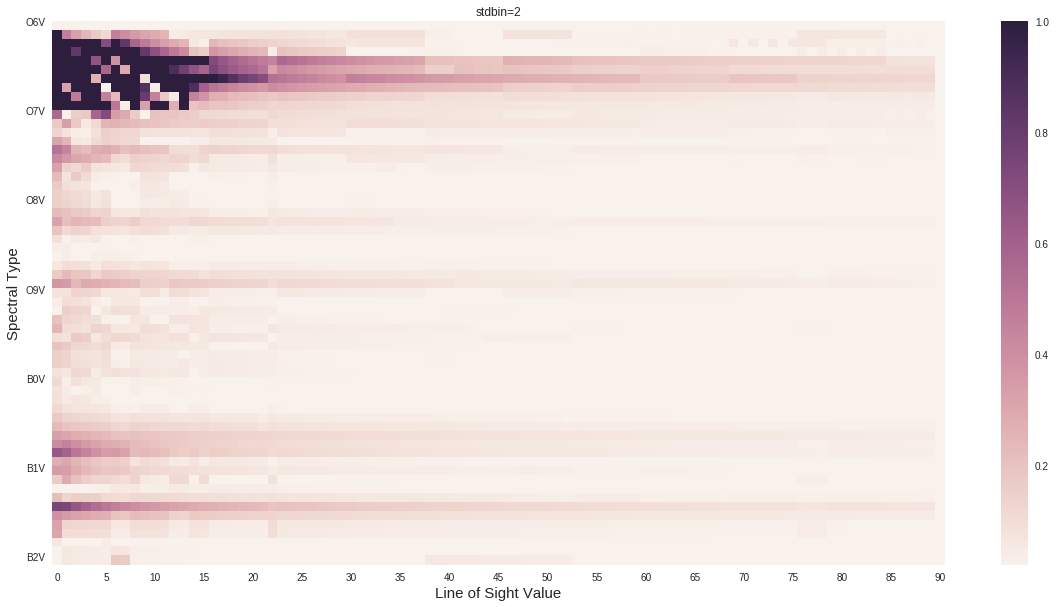

In [136]:
##Heat map of the difference values##
np.random.seed(0)

fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.heatmap(diff,vmin=0.02,vmax=1,xticklabels=5)          #arbitratily decided that the max would be zero, when unset it made the whole thing mostly white
plt.gca().invert_yaxis()     #invert's yaxsis so that the higher spectral types are at the top

#title and labels
plt.title('stdbin=2')
plt.yticks(np.arange(0,61,step=10),SpType)
plt.ylabel('Spectral Type',fontsize=15)
plt.xlabel('Line of Sight Value',fontsize=15)

heat map of difference in right and left error values for standardbin=5 

Text(0.5,69,u'Line of Sight Value')

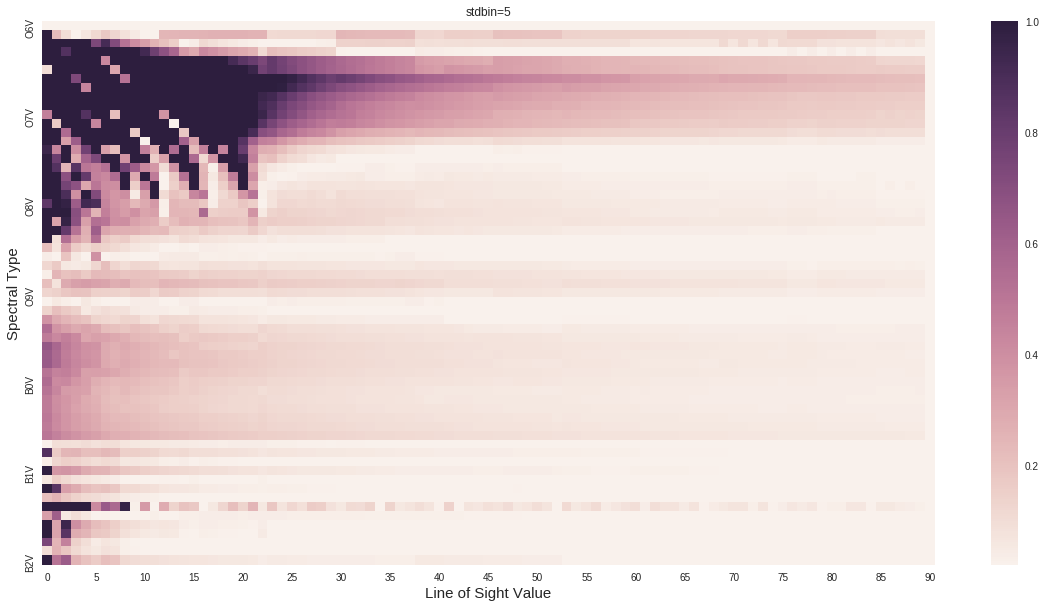

In [137]:
#making heatmap
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.heatmap(diff5,vmin=0.02,vmax=1,xticklabels=5,yticklabels=5)
plt.gca().invert_yaxis()  #higher spectral types on top.

#titles and labels
plt.title('stdbin=5')
plt.yticks(np.arange(0,61,step=10),SpType)
plt.ylabel('Spectral Type',fontsize=15)
plt.xlabel('Line of Sight Value',fontsize=15)

##Making contour plot!
this is really just an attempt to get a contout plot that will give us a "safe zone" and an unsafe zone with a simple line where the diff in sigma is bigger or smaller than 0.02. this value might have to change depending on what our plots look like. 

In [0]:
##set up for contour plots##

import matplotlib.cm as cm
import matplotlib.mlab as mlab


#Setting up the grid for the contour
x=np.arange(0,91,1)
y=np.arange(0,61,1)
X,Y=np.meshgrid(x,y)
V=np.array([0,0.08,1000])  #this specifies the contour values high middle and low to fill in. 

### Standard bin of 2

Text(20,52,u'Danger Zone')

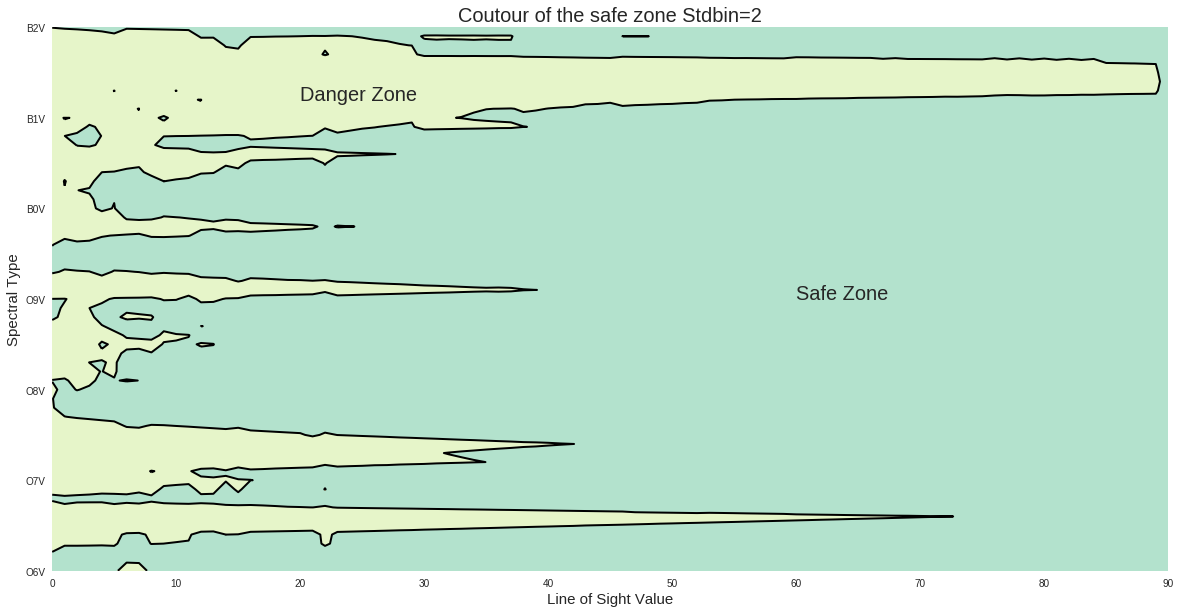

In [142]:
#plotting contour using stdbin 2 difference values 
plt.figure(figsize=(20,10))
plt.contour(X,Y,diff,V,colors='black',linewidths=2)   #plots contour lines
plt.contourf(X,Y,diff,V,cmap='Pastel2')               #Fills in between contour lines

#Labels and titles
plt.title('Coutour of the safe zone Stdbin=2', fontsize=20)
plt.yticks(np.arange(0,61,step=10),SpType)
plt.ylabel('Spectral Type',fontsize=15)
plt.xlabel('Line of Sight Value',fontsize=15)
plt.text(60,30,'Safe Zone',fontsize=20)
plt.text(20,52,'Danger Zone',fontsize=20)

### For standard bin of 5
It appears that some of these difference values are very large this is probably for those cases when we have very large 

Text(20,52,u'Danger Zone')

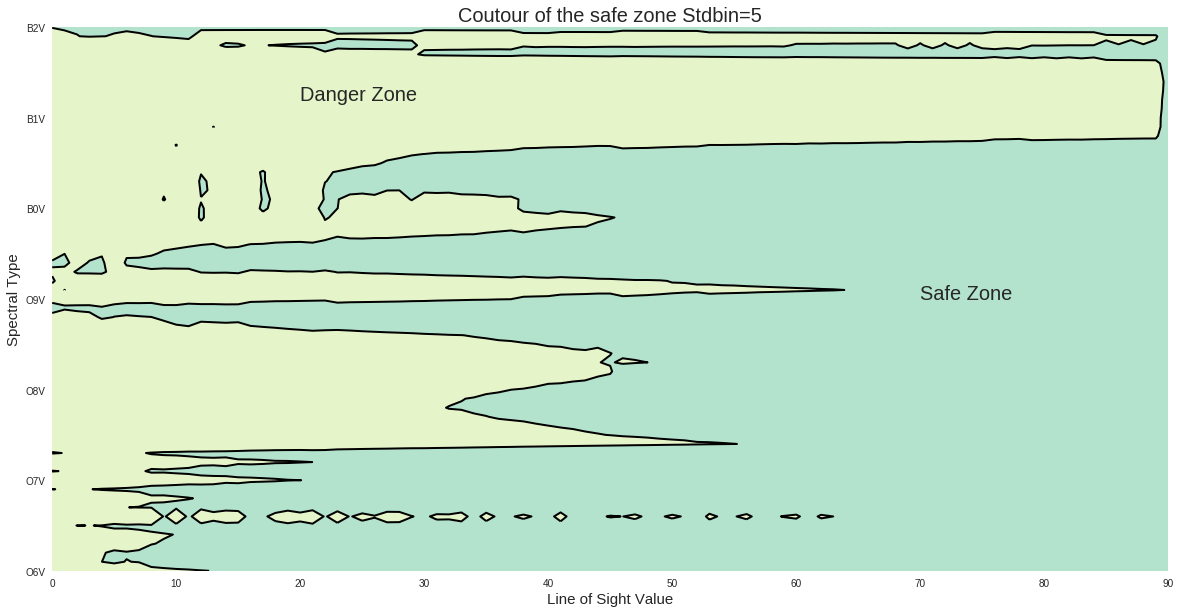

In [143]:
#plotting contour using stdbin 5 difference values 
plt.figure(figsize=(20,10))
plt.contour(X,Y,diff5,V,colors='black',linewidths=2)   #plots the contours
plt.contourf(X,Y,diff5,V,cmap='Pastel2')               #fills in contours

#labels and things
plt.title('Coutour of the safe zone Stdbin=5', fontsize=20)
plt.yticks(np.arange(0,61,step=10),SpType)
plt.ylabel('Spectral Type',fontsize=15)
plt.xlabel('Line of Sight Value',fontsize=15)
plt.text(70,30,'Safe Zone',fontsize=20)
plt.text(20,52,'Danger Zone',fontsize=20)